In [183]:
import pandas as pd
import numpy as np

Weather = pd.read_csv('weather_hourly_boston.csv', sep=',')
Rents = pd.read_csv('KPI_total_rents_per_hour.csv', sep=',')

df_rents = pd.DataFrame(Rents)
df_weather = pd.DataFrame(Weather)

df_weather = df_weather.dropna()
begin_2019 = pd.to_datetime('2019-01-01 00:00')
end_2019 = pd.to_datetime('2019-12-31 23:00')

times = pd.to_datetime(df_weather.date_time)
df_weather_2019 = df_weather.loc[(times.dt.year >= 2019) & (times.dt.year <= 2019)]
df_weather_2019 = df_weather_2019.reset_index()
df_weather_2019 = df_weather_2019.set_index('date_time')

df_weather_2019.index = df_weather_2019.index.rename('hour')
df_weather_and_rents = pd.merge(df_weather_2019,df_rents,on='hour',how='left')
df_weather_and_rents = df_weather_and_rents.drop_duplicates(subset=['hour'], keep='first')
df_weather_and_rents = df_weather_and_rents.dropna()
df_weather_and_rents = df_weather_and_rents.sort_values(by=['hour'])
df_weather_and_rents = df_weather_and_rents.drop('index', axis='columns')
df_weather_and_rents['avg_temp'] = (df_weather_and_rents['max_temp'] + df_weather_and_rents['min_temp'])/2
df_weather_and_rents = df_weather_and_rents.drop(['min_temp','max_temp'], axis='columns')

df_weather_and_rents['rents_count_rescaled'] = (df_weather_and_rents['rents_count'] - df_weather_and_rents['rents_count'].min()) / (df_weather_and_rents['rents_count'].max() - df_weather_and_rents['rents_count'].min())
df_weather_and_rents['avg_temp_rescaled'] = (df_weather_and_rents['avg_temp'] - df_weather_and_rents['avg_temp'].min()) / (df_weather_and_rents['avg_temp'].max() - df_weather_and_rents['avg_temp'].min())
df_regression = df_weather_and_rents[['rents_count_rescaled', 'avg_temp_rescaled', 'precip']]
df_regression = df_regression.sort_values(by=['avg_temp_rescaled'])
df_regression = df_regression.reset_index(drop=True)
df_regression.columns = ['rents', 'temperature', 'precip']
df_regression = df_regression.set_index('temperature')
df_regression.to_csv('regression_data.csv')

7429


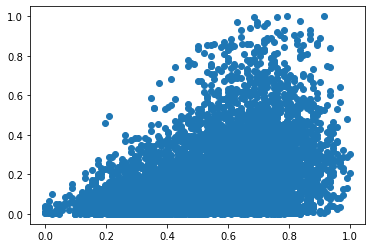

In [191]:
import matplotlib.pyplot as plt
df_precip_yes = df_regression.loc[df_regression['precip'] == 0]
print(len(df_precip_yes))
plt.scatter(df_precip_yes.index, df_precip_yes['rents'])